In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Titanic dataset from Seaborn package

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Scatter plot with regression line (mean line)

In [3]:
# Set style theme (5 options: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

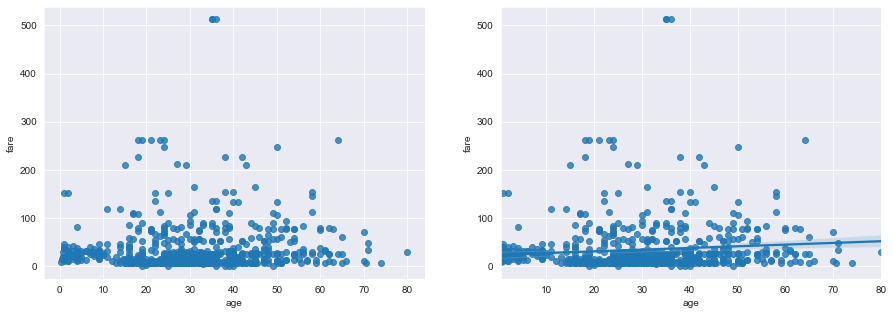

In [4]:
# Create graph object
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax1,
            fit_reg=False 
           )

sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=ax2,
            fit_reg=True 
           )

plt.show()

# Heatmap 
: Place two categorical variables on the x and y axes and classify the data in matrix form


In [5]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


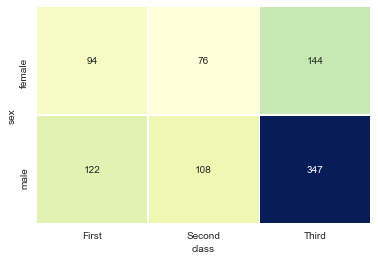

In [6]:
# Draw heatmap

sns.heatmap(table,
            annot=True, fmt='d',
            cmap='YlGnBu', 
            linewidths=0.5,
            cbar=False
           )
plt.show()

---
# Scatter plot of categorical data
-Check the distribution of data for each category within a categorical variable
-stripplot()
-swarmplot(): Considers the dispersion of data to prevent overlapping`

In [7]:
sns.set_style("whitegrid")

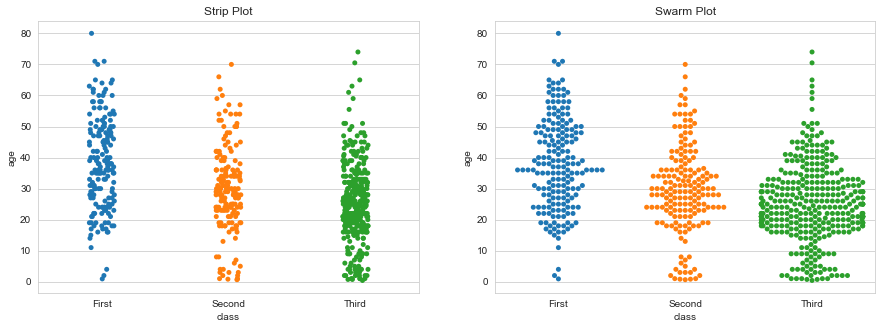

In [8]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1 ,2 ,2)

sns.stripplot(x='class',
              y='age',
              data=titanic,
              ax=ax1
             )
sns.swarmplot(x='class',
              y='age',
              data=titanic,
              ax=ax2
             )

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

# Bar Graph

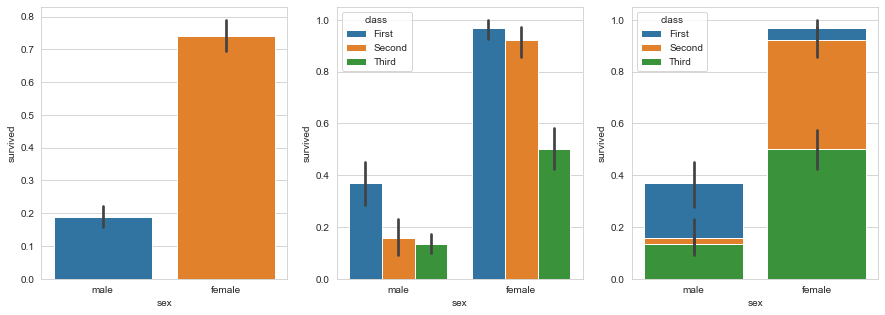

In [9]:
fig= plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',
            y='survived',
            data=titanic,
            ax = ax1
           )

sns.barplot(x='sex',
            y='survived',
            data=titanic,
            hue='class',
            ax = ax2
           )

sns.barplot(x='sex',
            y='survived',
            data=titanic,
            hue='class',
            ax = ax3,
            dodge=False
           )



plt.show()

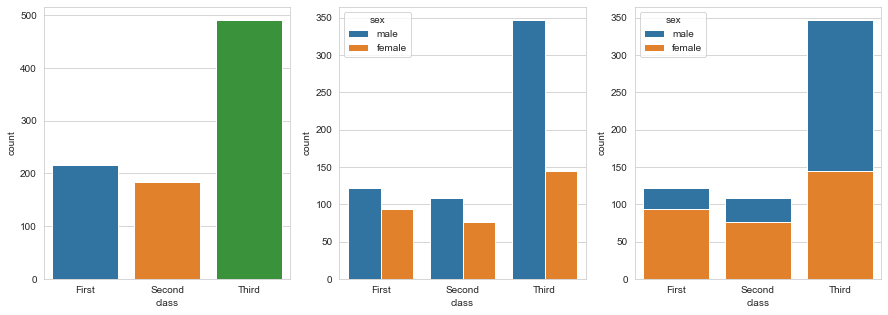

In [10]:

fig= plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x = 'class',
              data=titanic,
              ax=ax1
             )

sns.countplot(x = 'class',
              data=titanic,
              ax=ax2,
              hue='sex'
             )

sns.countplot(x = 'class',
              data=titanic,
              ax=ax3,
              hue='sex',
              dodge=False
             )


plt.show()

---
# Box Plot

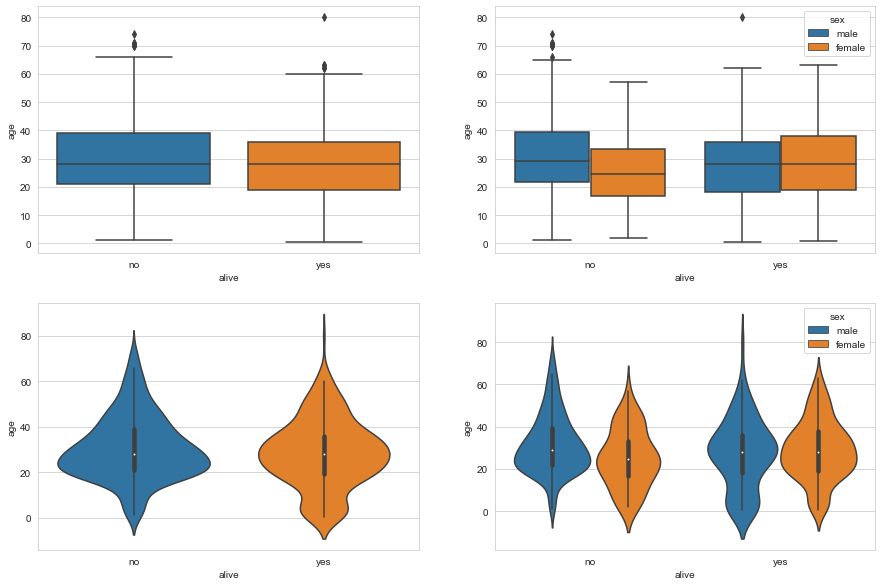

In [11]:
fig= plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive',
            y='age',
            data=titanic,
            ax=ax1
           )

sns.boxplot(x='alive',
            y='age',
            hue='sex',
            data=titanic,
            ax=ax2
           )

sns.violinplot(x='alive',
            y='age',
            data=titanic,
            ax=ax3
           )

sns.violinplot(x='alive',
            y='age',
            hue='sex',
            data=titanic,
            ax=ax4
           )


plt.show()

# Joint Graph

Based on a scatter plot, simultaneously providing histograms on each axis

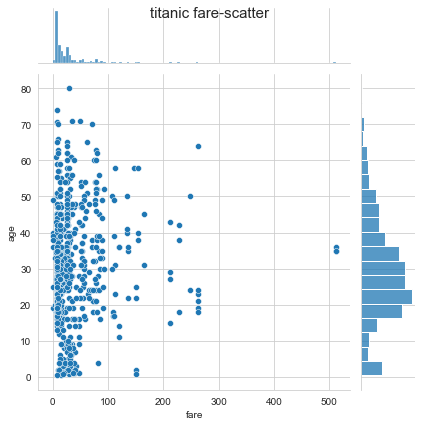

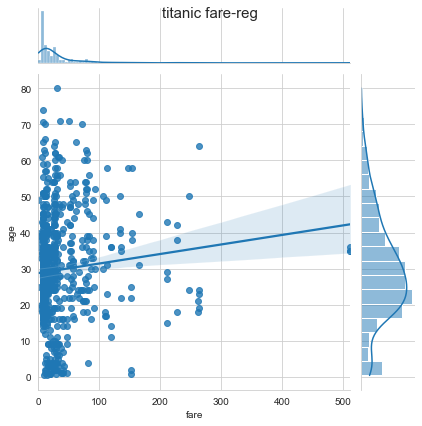

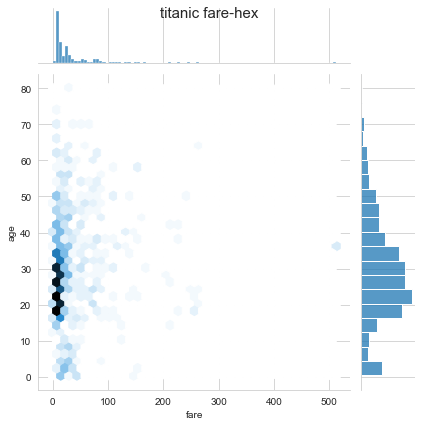

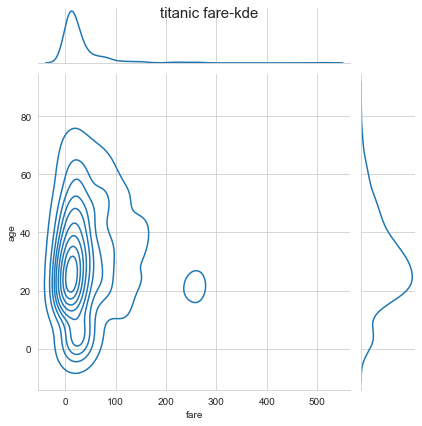

In [12]:
j1 = sns.jointplot(x='fare',
                   y='age',
                   data=titanic
                  )
j1.fig.suptitle('titanic fare-scatter', size=15)
# ---------------------------------------------------
j2 = sns.jointplot(x='fare',
                   y='age',
                   data=titanic,
                   kind='reg'
                  )
j2.fig.suptitle('titanic fare-reg', size=15)
# ----------------------------------------------------
j3 = sns.jointplot(x='fare',
                   y='age',
                   data=titanic,
                   kind='hex'
                  )
j3.fig.suptitle('titanic fare-hex', size=15)
# ----------------------------------------------------
j4 = sns.jointplot(x='fare',
                   y='age',
                   data=titanic,
                   kind='kde' # 밀집 그래프
                  )
j4.fig.suptitle('titanic fare-kde', size=15)





plt.show()

# Split the screen into grids based on conditions

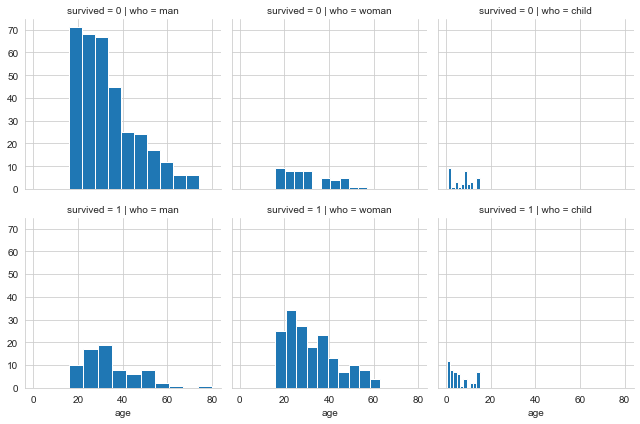

In [13]:
g = sns.FacetGrid(data=titanic,
                  col = 'who',
                  row = 'survived'
                 )

g = g.map(plt.hist, 'age')